In [1]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from tqdm import tqdm
from small2DNet import small2DNet
from small3DNet import small3DNet
from util import add_color, colorize, colorize_gaussian, calculate_correct_loss
from colorMNist import colorMNist
import random
import colorsys
import pickle
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

0
Uni
tensor(0.)
tensor(1.)
torch.Size([3, 3, 3])


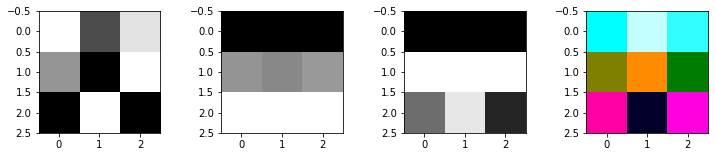




CL
tensor(0.)
tensor(1.)
torch.Size([3, 3, 3])


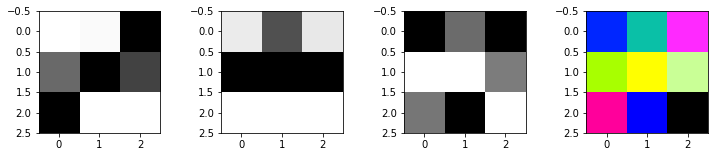




1
Uni
tensor(0.)
tensor(1.)
torch.Size([3, 3, 3])


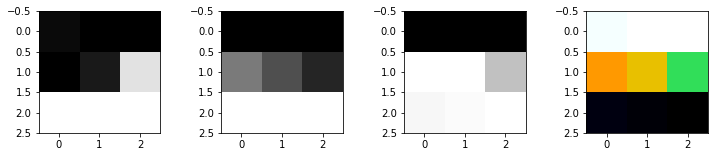




CL
tensor(0.)
tensor(1.)
torch.Size([3, 3, 3])


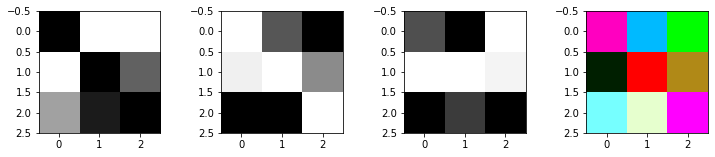




2
Uni
tensor(0.)
tensor(1.)
torch.Size([3, 3, 3])


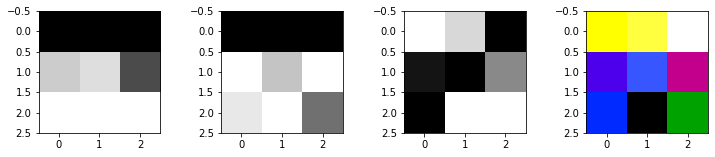




CL
tensor(0.)
tensor(1.)
torch.Size([3, 3, 3])


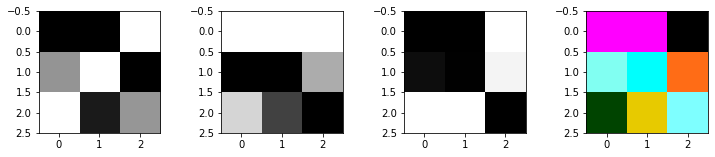




3
Uni
tensor(0.)
tensor(1.)
torch.Size([3, 3, 3])


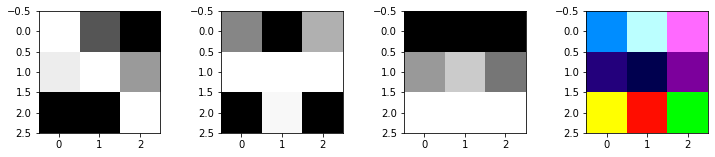




CL
tensor(0.)
tensor(1.)
torch.Size([3, 3, 3])


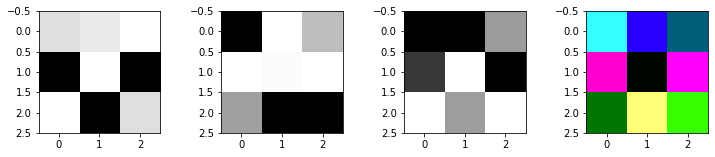




4
Uni
tensor(0.)
tensor(1.)
torch.Size([3, 3, 3])


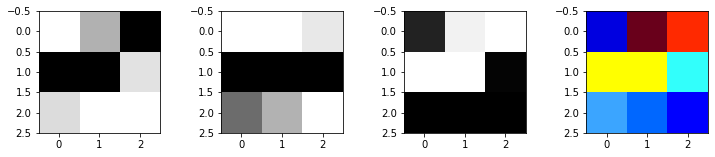




CL
tensor(0.)
tensor(1.)
torch.Size([3, 3, 3])


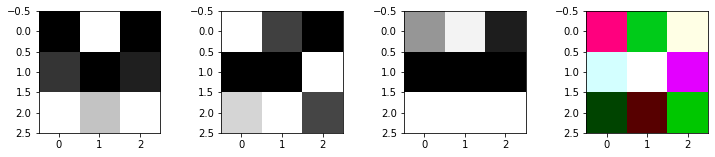




5
Uni
tensor(0.)
tensor(1.)
torch.Size([3, 3, 3])


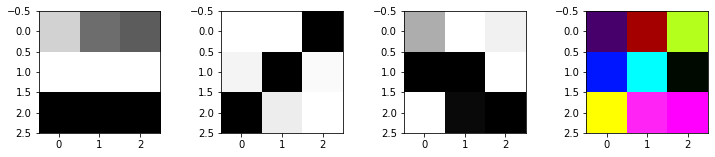




CL
tensor(0.)
tensor(1.)
torch.Size([3, 3, 3])


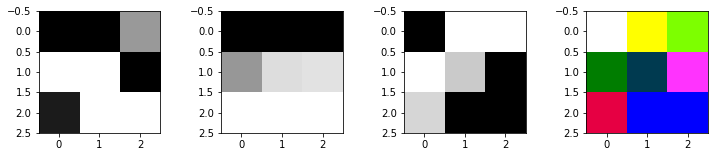




6
Uni
tensor(0.)
tensor(1.)
torch.Size([3, 3, 3])


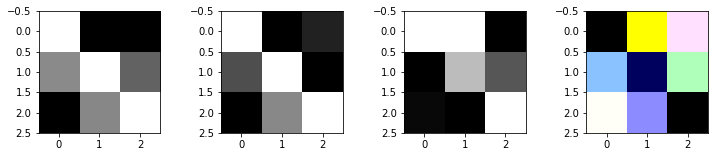




CL
tensor(0.)
tensor(1.)
torch.Size([3, 3, 3])


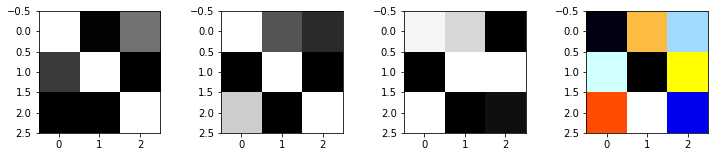




7
Uni
tensor(0.)
tensor(1.)
torch.Size([3, 3, 3])


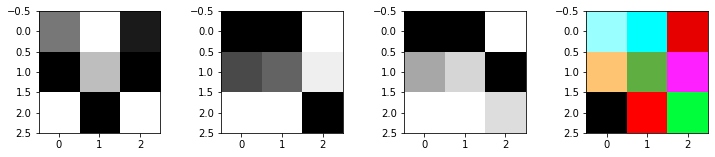




CL
tensor(0.)
tensor(1.)
torch.Size([3, 3, 3])


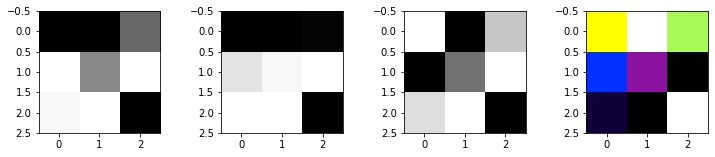

In [4]:
# Uniform
# Layers of the model
model_layers = [8, 8, "M", 16,"M"]

models = []
model = small2DNet(model_layers, 16)
model.load_state_dict(torch.load('model_saves/2D/Uniform2D.pth'))
model.cuda()
models.append([model, "Uni"])
model = small2DNet(model_layers, 16)
model.load_state_dict(torch.load('model_saves/2D/Colorless2D.pth'))
model.cuda()
models.append([model, "CL"])
model = small3DNet(model_layers, 16)
# model.load_state_dict(torch.load('model_saves/3D/Deterministic3D.pth'))
# model.cuda()
# models.append([model, "Deterministic3D"])
# model = small3DNet(model_layers, 16)
# model.load_state_dict(torch.load('model_saves/3D/Colorless3D.pth'))
# model.cuda()
# models.append([model, "Colorless3D"])

children = []
for i in range(len(models)):
    childs = [x for x in models[i][0].children()]
    children.append(childs)

for i in range(children[0][0][0].weight.shape[0]):
    print(i)
    
    for j in range(len(models)):
        print(models[j][1])
        
        img = children[j][0][0].weight[i].cpu().detach()
        
        # img = torch.rand([3, 5, 5])
        
        if j >= 2:
            img = img[0]
            
            
        img -= img.min(1, keepdim=True)[0]
        img /= img.max(1, keepdim=True)[0]
        
        # print(img)
        print(img.min())
        print(img.max())
        print(img.shape)

        # Show batch images
        fig, axs = plt.subplots(1,4, figsize=(12, 12), facecolor='w', edgecolor='k')
        fig.subplots_adjust(hspace = .001, wspace=.5)
        axs = axs.ravel()
        for k in range(len(img)):
            axs[k].imshow(img[k].numpy(), cmap='Greys', vmin=0, vmax=1)

        axs[3].imshow(img.permute(1, 2, 0), cmap='Greys', vmin=0, vmax=1)

        plt.show()

        print("\n\n")
    